In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
pio.templates.default = "plotly_white"

data = pd.read_csv("ad_10000records.csv")
print(data.head())

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     62.26   32     69481.85                172.83   
1                     41.73   31     61840.26                207.17   
2                     44.40   30     57877.15                172.83   
3                     59.88   28     56180.93                207.17   
4                     49.21   30     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country        Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands   6/9/2016 21:43              0  
1                     Singapore  1/16/

In [2]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,61.657488,35.938782,53840.091087,177.758525,0.491647
std,15.704480,8.573801,13344.085332,40.820916,0.499955
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44078.240000,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [2]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,6/9/2016 21:43,0
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,1/16/2016 17:56,0
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,6/29/2016 10:50,0
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,6/21/2016 14:32,0
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,7/21/2016 10:54,1


In [3]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
9992,41.73,31,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,1/3/2016 3:22,1
9993,41.73,28,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,5/28/2016 12:20,0
9994,55.60,39,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,1/5/2016 11:53,0
9995,46.61,50,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,4/4/2016 7:07,1
9996,46.61,43,60575.99,198.45,Optimized upward-trending productivity,Port Jeffrey,Male,Northern Mariana Islands,4/3/2016 21:13,1


In [4]:
data["Clicked on Ad"] = data["Clicked on Ad"].map({0: "No", 1: "Yes"})


In [5]:
data["Clicked on Ad"].value_counts()

No     5082
Yes    4915
Name: Clicked on Ad, dtype: int64

In [10]:
click_through_rate = 4915 / 10000 * 100
print(click_through_rate)

49.15


In [7]:
data["Gender"] = data["Gender"].map({"Male": 1, 
                               "Female": 0})

x=data.iloc[:,0:7]
x=x.drop(['Ad Topic Line','City'],axis=1)
y=data.iloc[:,9]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x, y)
y_pred = model.predict(xtest)

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.965


In [10]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = np.array([[a, b, c, d, e]])
print("Will the user click on ad = ", model.predict(features))

Ads Click Through Rate Prediction : 
Daily Time Spent on Site: 30
Age: 52
Area Income: 24000
Daily Internet Usage: 201
Gender (Male = 1, Female = 0) : 1
Will the user click on ad =  ['Yes']


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


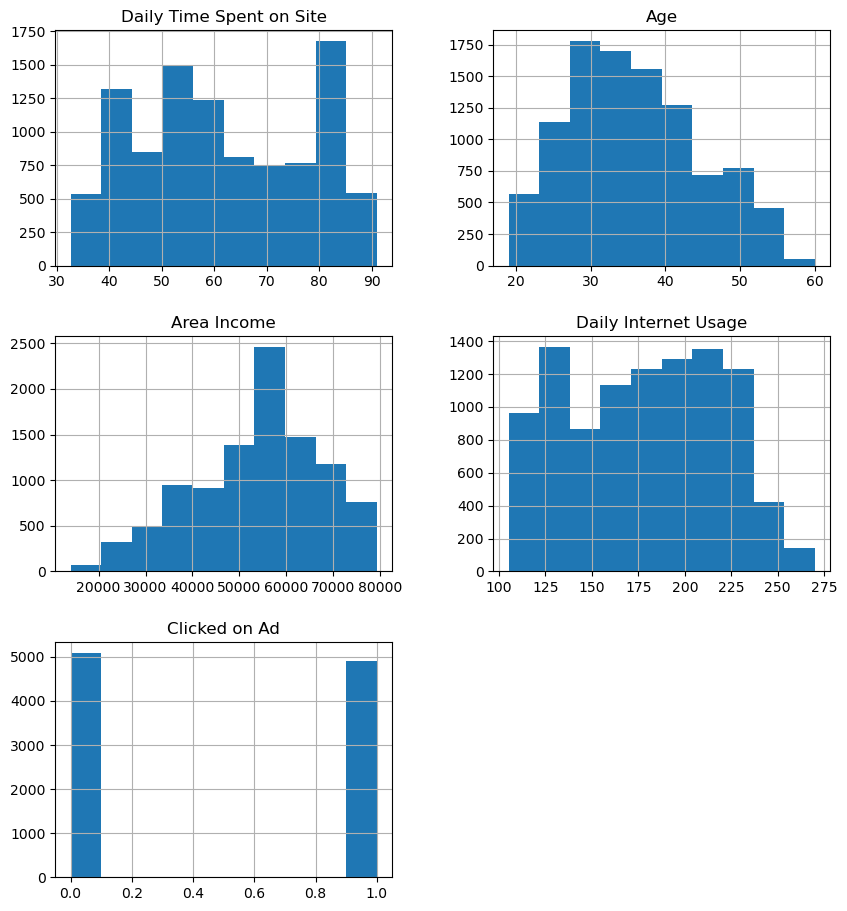

In [2]:
data.hist(figsize=(10,11))
plt.show()